Autoencoders

In [19]:
%tensorflow_version 2.x

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [20]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [21]:
from tensorflow import keras

Loading The data

In [22]:

# Load the MNIST dataset from Keras
(x_train, _), (x_test, _) = keras.datasets.mnist.load_data()

# Normalize the training data to be in the range [0, 1]
x_train = x_train / 255.0

# Normalize the test data to be in the range [0, 1]
x_test = x_test / 255.0

A Simple autoencoder

In [23]:
# Create the encoder model
encoder = keras.models.Sequential([
    # Flatten the input images (28x28) into a 1D array of 784 elements
    keras.layers.Flatten(input_shape=[28, 28]),
    # Add a dense layer with 100 neurons and ReLU activation function
    keras.layers.Dense(100, activation="relu"),
    # Add another dense layer with 30 neurons and ReLU activation function
    keras.layers.Dense(30, activation="relu"),
])

In [24]:
# Create the decoder model
decoder = keras.models.Sequential([
    # Ad a dense layer with 100 neurons and Relu
    keras.layers.Dense(100, activation="relu", input_shape=[30]),
    keras.layers.Dense(28 * 28, activation = "sigmoid"),
    keras.layers.Reshape([28 , 28])
])

Not stack them for Training:

In [25]:
# Stack the encoder and decoder models to create the autoencoder
stacked_autoencoder = keras.models.Sequential([encoder, decoder])

In [26]:
# Compile the stacked autoencoder model
stacked_autoencoder.compile(
    # Use binary cross-entropy loss function for binary input data (normalized pixel values)
    loss="binary_crossentropy",
    # Use the Adam optimizer for efficient training
    optimizer='adam'
)

In [27]:
# Train the stacked autoencoder model
history = stacked_autoencoder.fit(
    # Input and target data are both x_train (input images) for reconstruction
    x_train, x_train,
    # Train for 10 epochs
    epochs=10,
    # Use x_test for validation during training
    validation_data=[x_test, x_test]
)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.1958 - val_loss: 0.1082
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1073 - val_loss: 0.1011
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1014 - val_loss: 0.0974
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0979 - val_loss: 0.0949
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0956 - val_loss: 0.0933
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0937 - val_loss: 0.0916
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0923 - val_loss: 0.0904
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0909 - val_loss: 0.0895
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0905 - val_loss: 0.0892
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0898 - val_loss: 0.0886


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


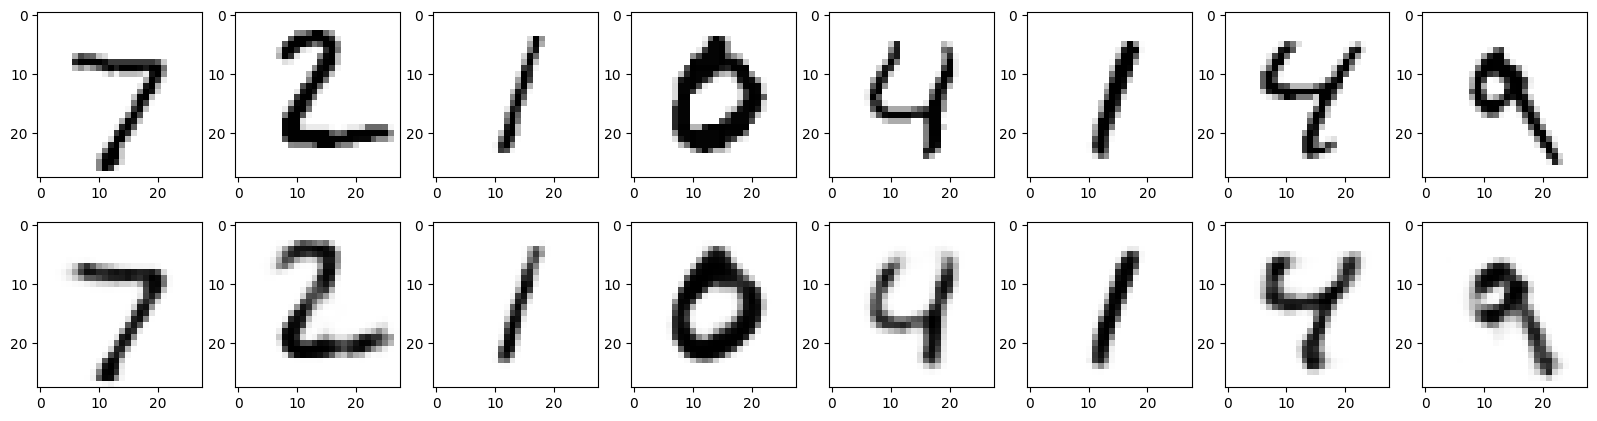

In [29]:
# Set the figure size for the plot
figsize(20, 5)

for i in range(8):
  subplot(2, 8, i+1)
  pred = stacked_autoencoder.predict(x_test[i].reshape((1, 28, 28)))
  # Display the original image
  imshow(x_test[i], cmap= "binary")

  subplot(2, 8, i+8+1)

  imshow(pred.reshape((28, 28)), cmap="binary")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step


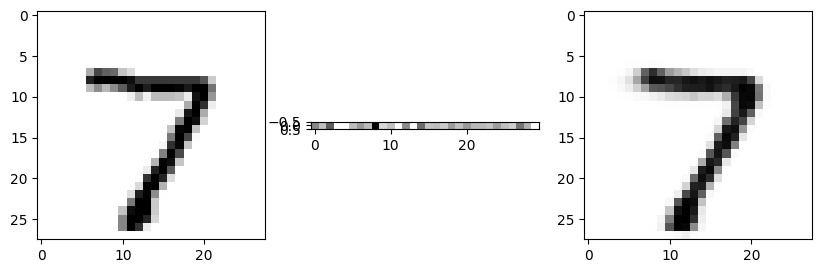

In [30]:
# Set the index i to choose a specific example from the test set
i = 0

# Set the figure size for the plot
figsize(10, 5)

subplot(1, 3, 1)
imshow(x_test[i], cmap="binary")

subplot(1,3, 2)

latent_vector = encoder.predict(x_test[i].reshape((1, 28, 28)))
imshow(latent_vector, cmap="binary")

subplot(1, 3, 3)

pred = decoder.predict(latent_vector)
imshow(pred.reshape((28, 28)), cmap="binary")

In [31]:
# Calculate the sparsity constraints

sparsity_low = 30 / (28 * 28)
sparsity_high = 1 - 30 / (28 * 28)

# Print the calculated values
print(sparsity_low, sparsity_high)

0.03826530612244898 0.9617346938775511


# Convolutional autoencoder

In [33]:

# Define the encoder model using convolutional layers
encoder = keras.models.Sequential([
    # Reshape the input into a 28x28x1 image (grayscale)
    keras.layers.Reshape([28, 28, 1], input_shape=[28, 28]),
    # First convolutional layer with 16 filters, each of size 3x3, ReLU activation, and padding to maintain size
    keras.layers.Conv2D(16, kernel_size=(3, 3), padding="same", activation="relu"),
    # Max pooling layer with pool size 2x2 to downsample the spatial dimensions
    keras.layers.MaxPool2D(pool_size=2),
    # Second convolutional layer with 32 filters, each of size 3x3, ReLU activation, and padding
    keras.layers.Conv2D(32, kernel_size=(3, 3), padding="same", activation="relu"),
    # Max pooling layer
    keras.layers.MaxPool2D(pool_size=2),
    # Third convolutional layer with 64 filters, each of size 3x3, ReLU activation, and padding
    keras.layers.Conv2D(64, kernel_size=(3, 3), padding="same", activation="relu"),
    # Max pooling layer
    keras.layers.MaxPool2D(pool_size=2)
])

In [34]:
# Predict the encoded representation of a single test image and print its shape
encoder.predict(x_test[0].reshape((1, 28, 28))).shape


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


(1, 3, 3, 64)

In [35]:

# Define the decoder model using convolutional transpose layers
decoder = keras.models.Sequential([
    # Convolutional transpose layer with 32 filters, each of size 3x3, stride 2, ReLU activation, and valid padding
    keras.layers.Conv2DTranspose(32, kernel_size=(3, 3), strides=2, padding="valid",
                                 activation="relu",
                                 input_shape=[3, 3, 64]),
    # Convolutional transpose layer with 16 filters, each of size 3x3, stride 2, ReLU activation, and same padding
    keras.layers.Conv2DTranspose(16, kernel_size=(3, 3), strides=2, padding="same",
                                 activation="relu"),
    # Convolutional transpose layer with 1 filter, size 3x3, stride 2, sigmoid activation, and same padding
    keras.layers.Conv2DTranspose(1, kernel_size=(3, 3), strides=2, padding="same",
                                 activation="sigmoid"),
    # Reshape the output into the original image shape (28x28)
    keras.layers.Reshape([28, 28])
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv_transpose.py:94: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [36]:
# Stack the encoder and decoder models to create the stacked autoencoder
stacked_autoencoder = keras.models.Sequential([encoder, decoder])

In [37]:
# Compile the stacked autoencoder model
stacked_autoencoder.compile(
    # Use binary cross-entropy loss function for binary input data (normalized pixel values)
    loss="binary_crossentropy",
    # Use the Adam optimizer for efficient training
    optimizer='adam'
)

In [38]:
# Train the stacked autoencoder model on the training data
history = stacked_autoencoder.fit(
    # Input and target data are both x_train (input images) for reconstruction
    x_train, x_train,
    # Train for 10 epochs
    epochs=10,
    # Use x_test for validation during training
    validation_data=[x_test, x_test]
)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 0.1980 - val_loss: 0.0848
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0834 - val_loss: 0.0782
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0783 - val_loss: 0.0755
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0755 - val_loss: 0.0733
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0735 - val_loss: 0.0718
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0723 - val_loss: 0.0711
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0715 - val_loss: 0.0704
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0707 - val_loss: 0.0700
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0703 - val_loss: 0.0691
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - loss: 0.0698 - val_loss: 0.0692


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


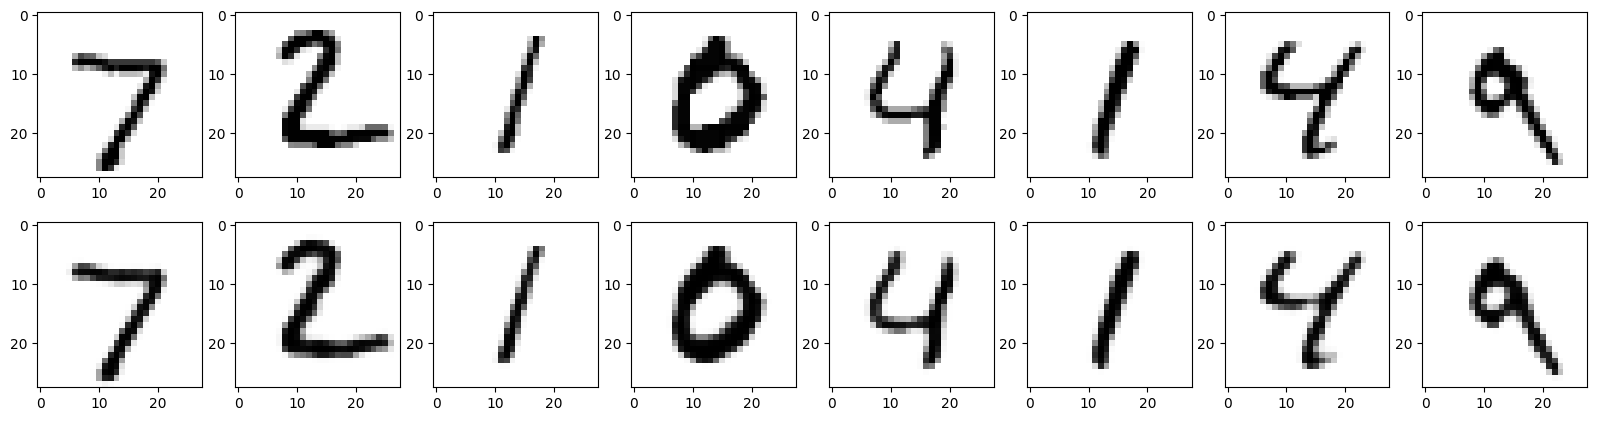

In [39]:
# Set the figure size for the plot
figsize(20, 5)

# Iterate over 8 examples from the test set
for i in range(8):
    # Plot the original image from the test set
    subplot(2, 8, i+1)
    # Make a prediction using the stacked autoencoder on the current test image
    pred = stacked_autoencoder.predict(x_test[i].reshape((1, 28, 28)))
    # Display the original image
    imshow(x_test[i], cmap="binary")

    # Plot the reconstructed image by the stacked autoencoder
    subplot(2, 8, i+8+1)
    # Display the reconstructed image
    imshow(pred.reshape((28, 28)), cmap="binary")


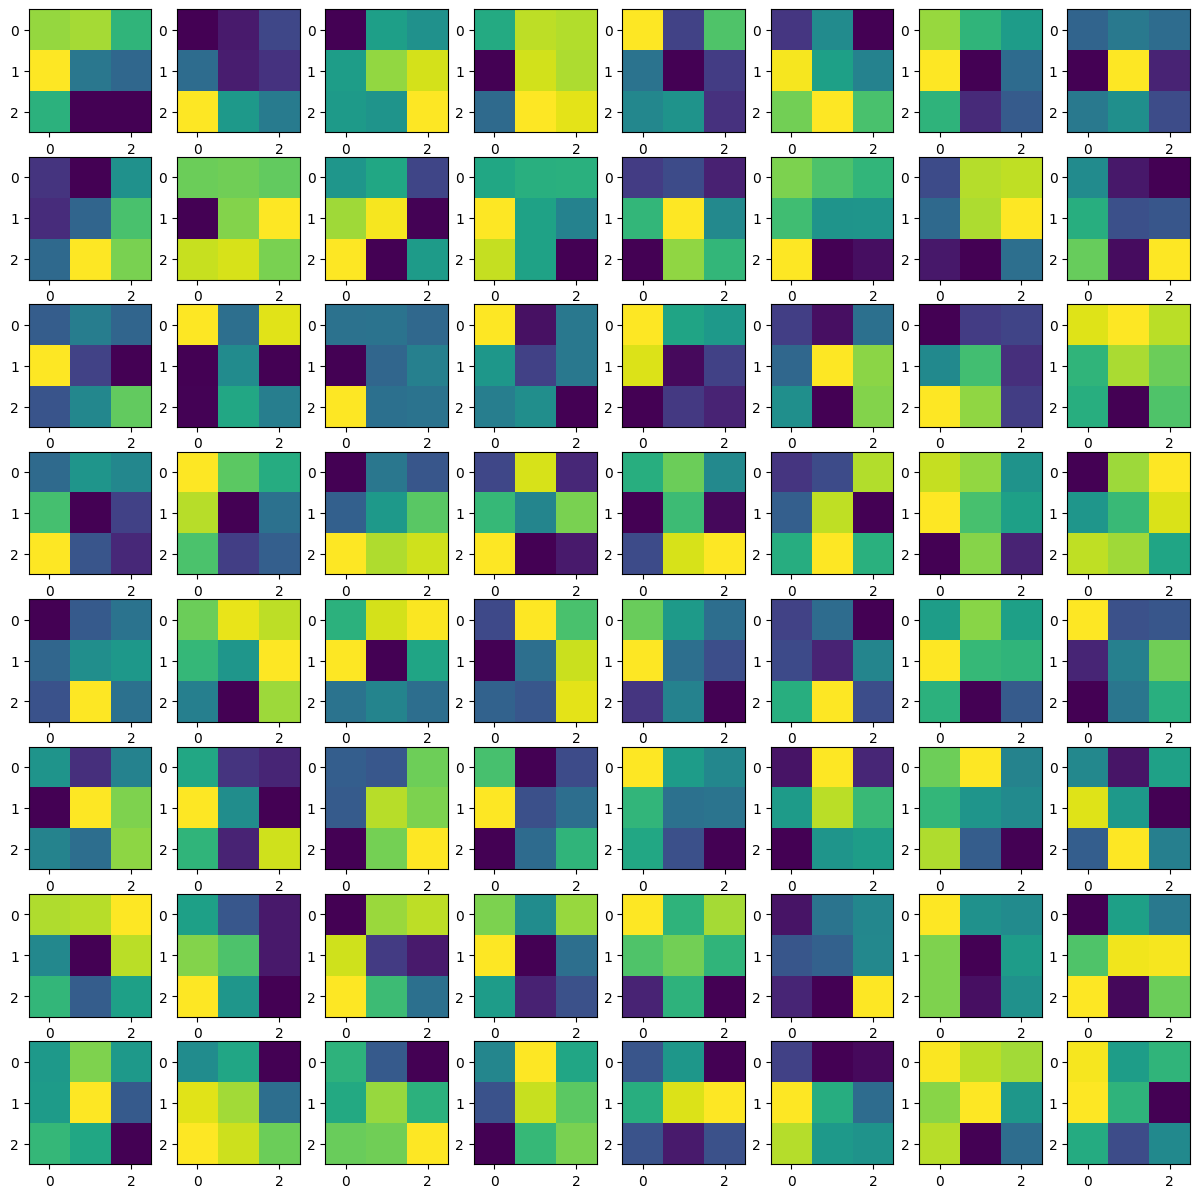

In [40]:
# Set the figure size for the plot
figsize(15, 15)

# Iterate over all filters in the last convolutional layer of the encoder
for i in range(8 * 8):
    # Plot each filter as a subplot in an 8x8 grid
    subplot(8, 8, i+1)
    # Display the weights (filters) of the convolutional layer
    imshow(encoder.layers[-2].weights[0][:, :, 0, i])


# Denoising autoencoder

In [41]:
import numpy as np

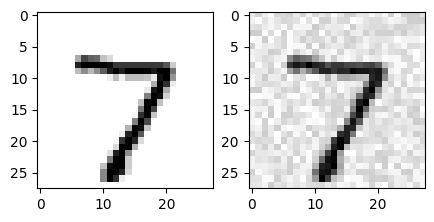

In [42]:
# Set the figure size for the plot
figsize(5, 10)

# Plot the original image from the test set
subplot(1, 2, 1)
imshow(x_test[0], cmap="binary")

# Plot the noisy version of the original image
subplot(1, 2, 2)
# Generate random noise and add it to the original image
noise = np.random.random((28, 28)) / 4
imshow(x_test[0] + noise, cmap="binary")

In [43]:
# Define the encoder model using dense (fully connected) layers
encoder = keras.models.Sequential([
    # Flatten the input images (28x28) into a 1D array of 784 elements
    keras.layers.Flatten(input_shape=[28, 28]),
    # Add a dense layer with 100 neurons and ReLU activation function
    keras.layers.Dense(100, activation="relu"),
    # Add another dense layer with 100 neurons and ReLU activation function
    keras.layers.Dense(100, activation="relu"),
    # Add a dense layer with 30 neurons and ReLU activation function to generate the latent space representation
    keras.layers.Dense(30, activation="relu")
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [44]:
# Define the decoder model using dense (fully connected) layers
decoder = keras.models.Sequential([
    # Add a dense layer with 100 neurons and ReLU activation function, input shape is 30 (latent space representation)
    keras.layers.Dense(100, activation="relu", input_shape=[30]),
    # Add another dense layer with 100 neurons and ReLU activation function
    keras.layers.Dense(100, activation="relu"),
    # Add a dense layer with 784 neurons (28*28) and sigmoid activation function to output pixel values in range [0, 1]
    keras.layers.Dense(28 * 28, activation="sigmoid"),
    # Reshape the output into the original image shape (28x28)
    keras.layers.Reshape([28, 28])
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [45]:
# Combine the encoder and decoder models to create the stacked autoencoder
stacked_autoencoder = keras.models.Sequential([encoder, decoder])

In [46]:
# Compile the stacked autoencoder model
stacked_autoencoder.compile(
    # Use binary cross-entropy loss function for binary input data (normalized pixel values)
    loss="binary_crossentropy",
    # Use the Adam optimizer for efficient training
    optimizer='adam'
)


Now create a dataset filled with noise:

In [47]:
# Add random noise to the training and test data
x_train_noise = x_train + ((np.random.random(x_train.shape)) / 4)
x_test_noise = x_test + ((np.random.random(x_test.shape)) / 4)


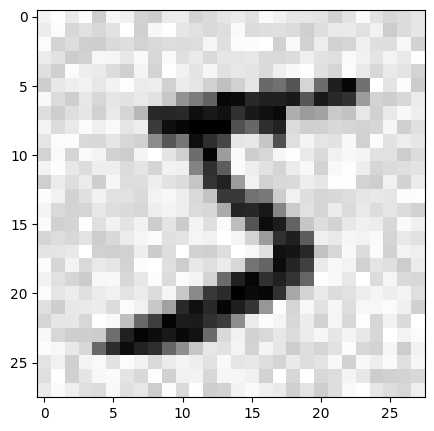

In [48]:
# Display an example of the noisy training data
imshow(x_train_noise[0], cmap="binary")


And finally train the stacked autoencoder with noise input data and clean output data.

In [49]:
# Train the stacked autoencoder model on the noisy training data
history = stacked_autoencoder.fit(
    # Input is the noisy training data (x_train_noise), target is the original clean training data (x_train)
    x_train_noise, x_train,
    # Train for 10 epochs
    epochs=10,
    # Use noisy test data (x_test_noise) for validation during training, with original clean test data (x_test) as target
    validation_data=[x_test_noise, x_test]
)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 0.2125 - val_loss: 0.1223
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1195 - val_loss: 0.1088
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1085 - val_loss: 0.1035
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1042 - val_loss: 0.1006
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1006 - val_loss: 0.0983
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0983 - val_loss: 0.0969
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 0.0963 - val_loss: 0.0940
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0945 - val_loss: 0.0928
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0936 - val_loss: 0.0929
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0926 - val_loss: 0.0912


In [ ]:
# Set the figure size for the plot
figsize(20,5)

# Iterate over 8 examples from the noisy test set
for i in range(8):
  # Plot the noisy version of the original image from the test set
  subplot(2, 8, i+1)
  imshow(x_test_noise[i], cmap="binary")
  # Plot the reconstructed image by the stacked autoencoder using the noisy input
  subplot(2, 8, i+8+1)
  # Make a prediction using the stacked autoencoder on the current noisy test image
  pred = stacked_autoencoder.predict(x_test_noise[i].reshape((1, 28, 28)))
  # Display the reconstructed image
  imshow(pred.reshape((28, 28)), cmap="binary")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
